# <center>Random Under-sampling</center>

![Blue to Green Gradient.png](<attachment:Blue to Green Gradient.png>)

## Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

plt.style.use("dark_background")

%matplotlib inline

---

## Create Data

In [14]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_redundant=0,
        n_clusters_per_class=1,
        weights=[0.99],
        class_sep= sep,# how separate the classes are
        random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

0    983
1     17
Name: count, dtype: int64


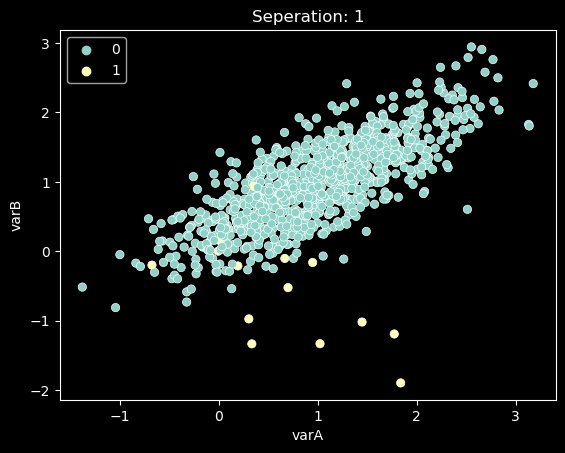

0    983
1     17
Name: count, dtype: int64


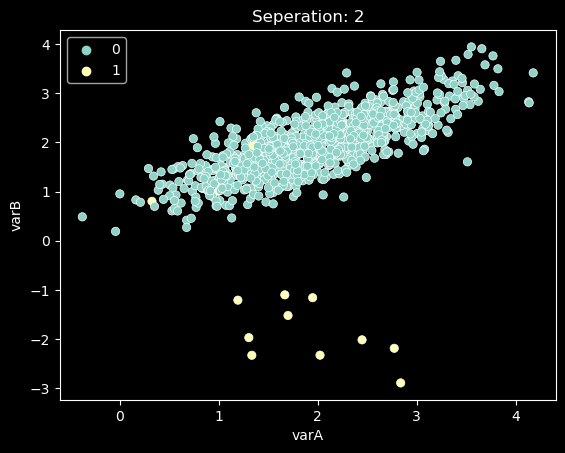

0    983
1     17
Name: count, dtype: int64


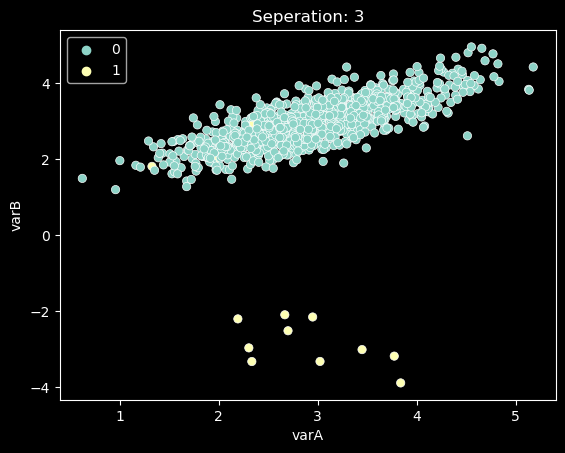

In [18]:
# make datasets with different class separation and plot

for sep in range(1, 4):
    
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data = X,
        x = "varA",
        y = "varB", 
        hue = y
    )
    plt.title(f"Seperation: {sep}")
    plt.show();

<blockquote>As we increase the parameter sep, the minority and majority class show less degree of overlap.</blockquote>

## Random Under Sampling